<a href="https://colab.research.google.com/github/rohandawar/ProcessMining/blob/main/Process_mining_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check out this: https://towardsdatascience.com/introduction-to-process-mining-5f4ce985b7e5

In [2]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=13f627cc357bf6c92042f5dc2fba3ec7fbf78593ea7b188c8fc2c8001cffc4f5
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=24950 sha256=f00829f04191cfa28848ce160b18494d76f1db4cb1098cd350fd08987a990fa1
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [26]:
# Import Libs
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [11]:
# read the data
# log = xes_importer.apply('https://raw.githubusercontent.com/pm4py/pm4py-core/release/tests/input_data/running-example.xes')

# Read the csv file
df = pd.read_csv('https://raw.githubusercontent.com/pm4py/pm4py-core/release/tests/input_data/running-example.csv')
# Change the details on datetime columns
df = dataframe_utils.convert_timestamp_columns_in_df(df)
# Sort the values on timestamp
df = df.sort_values('time:timestamp')
df.head()

,Activity,Costs,Resource,case:concept:name,case:creator,concept:name,org:resource,time:timestamp
14,register request,50,Pete,1,Fluxicon Nitro,register request,Pete,2010-12-30 10:02:00+00:00
9,register request,50,Mike,2,Fluxicon Nitro,register request,Mike,2010-12-30 10:32:00+00:00
10,check ticket,100,Mike,2,Fluxicon Nitro,check ticket,Mike,2010-12-30 11:12:00+00:00
11,examine casually,400,Sean,2,Fluxicon Nitro,examine casually,Sean,2010-12-30 13:16:00+00:00
0,register request,50,Pete,3,Fluxicon Nitro,register request,Pete,2010-12-30 13:32:00+00:00


In [15]:
df.shape

(42, 8)

In [12]:
# Convert the log
log = log_converter.apply(df)

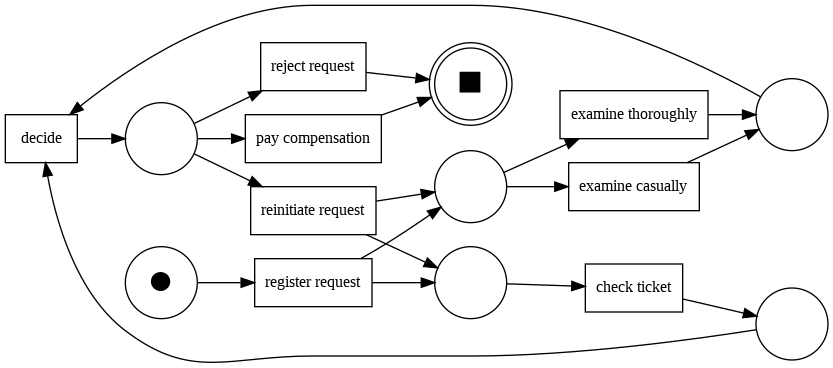

In [14]:
# Implementing Alpha Miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# Viz
gviz = pn_visualizer.apply(net, initial_marking,final_marking)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

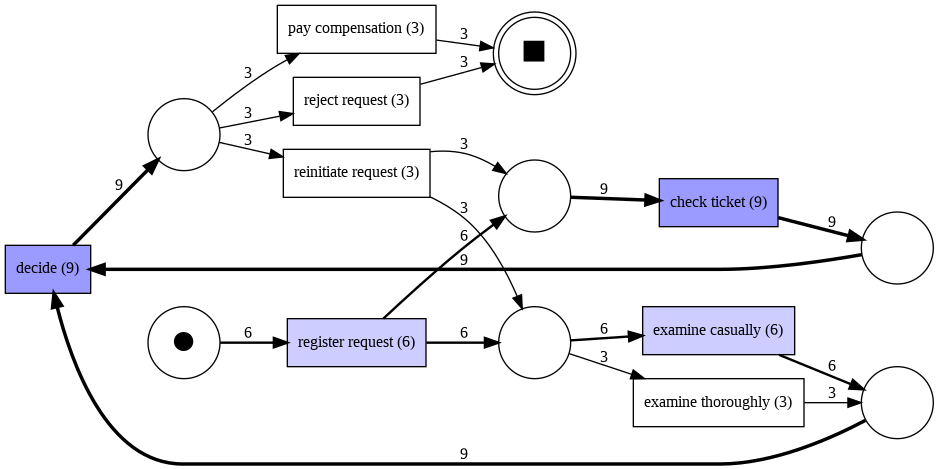

In [18]:
# Adding frequency to the events
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT:"png"}
gviz = pn_visualizer.apply(net,
                           initial_marking,
                           final_marking,
                           variant = pn_visualizer.Variants.FREQUENCY,
                           log = log)
pn_visualizer.view(gviz)

# Directed Flow Graphs

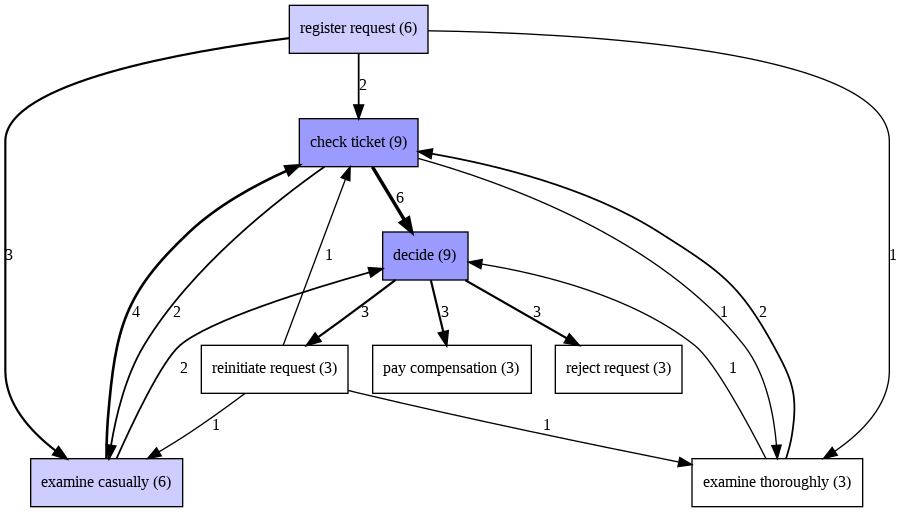

In [20]:
dfg = dfg_discovery.apply(log)

# viz
gviz = dfg_visualization.apply(dfg, log = log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

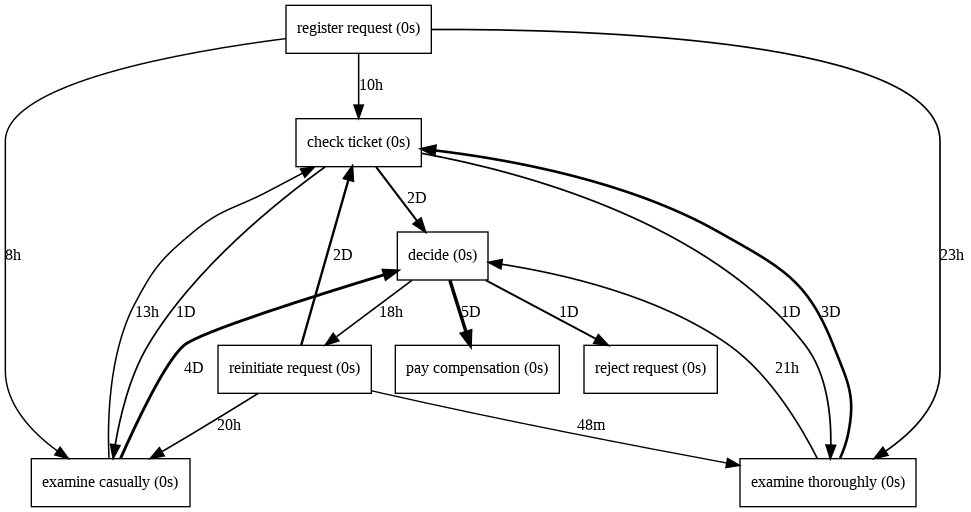

In [23]:
# Implemeinting Performance Variant, we get time between 2 events
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# viz
gviz = dfg_visualization.apply(dfg, log = log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

# Heuristic Miner Model

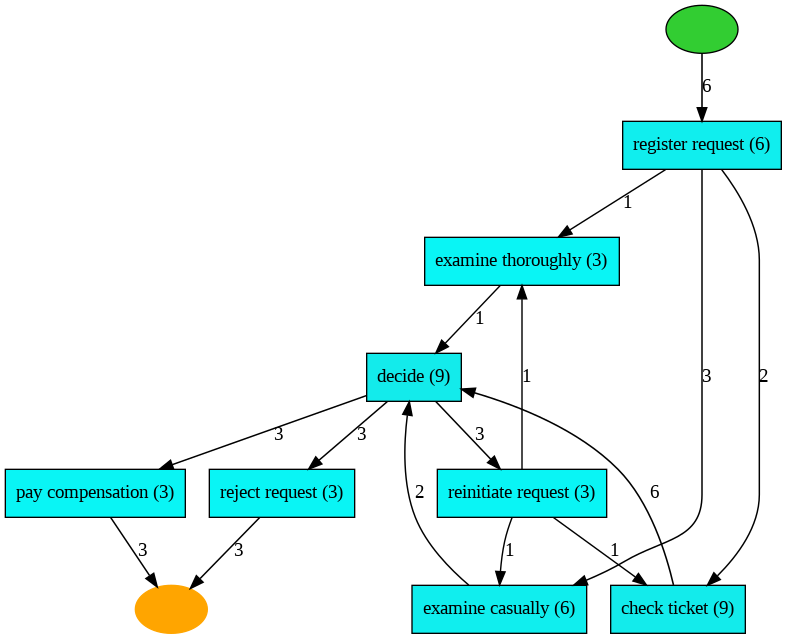

In [28]:
heu_net = heuristics_miner.apply_heu(log)

# Viz 
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

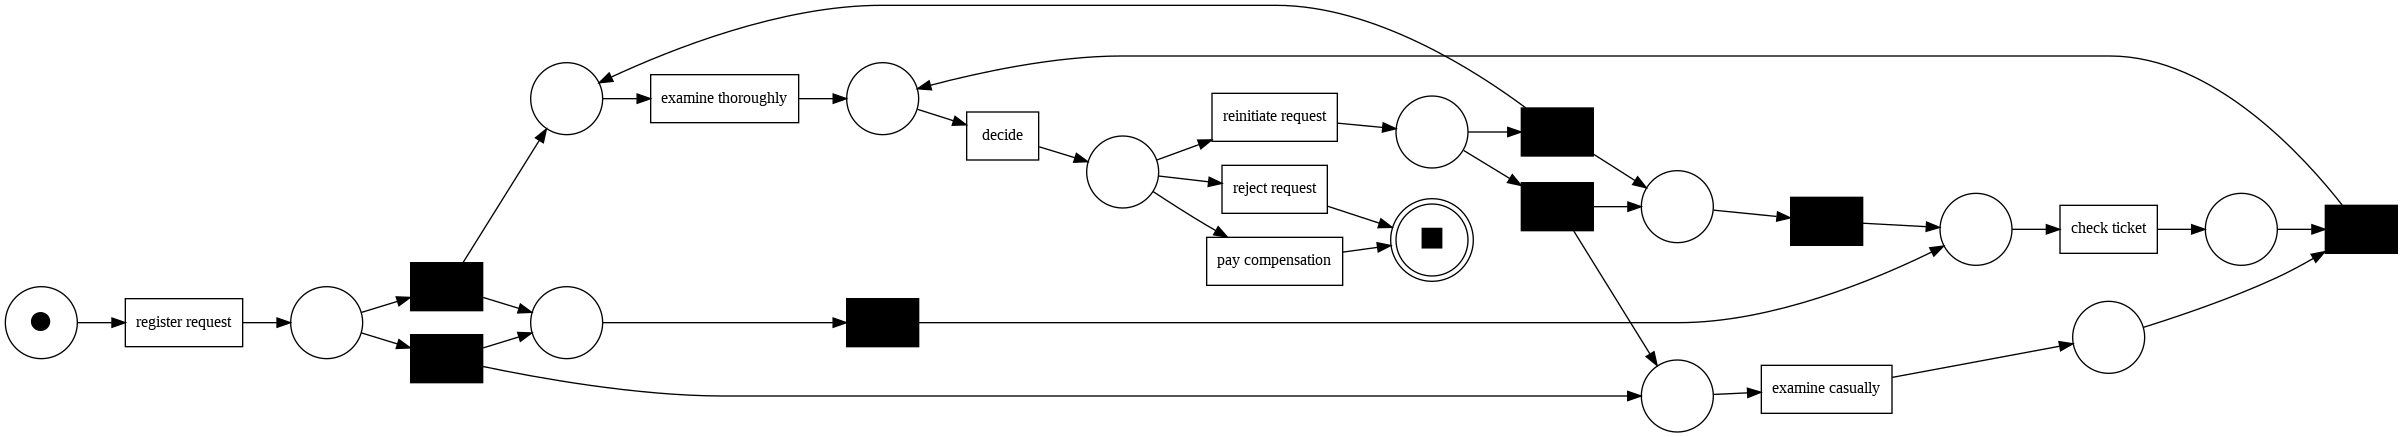

In [29]:
# Petrinet based on Heuristics Miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net,im,fm)
pn_visualizer.view(gviz)

# Inductive Miner Algorithm

In [30]:
# # create the process tree
# tree = inductive_miner.apply_tree(log)

# # viz
# gviz = pt_visualizer.apply(tree)
# pt_visualizer.view(gviz)

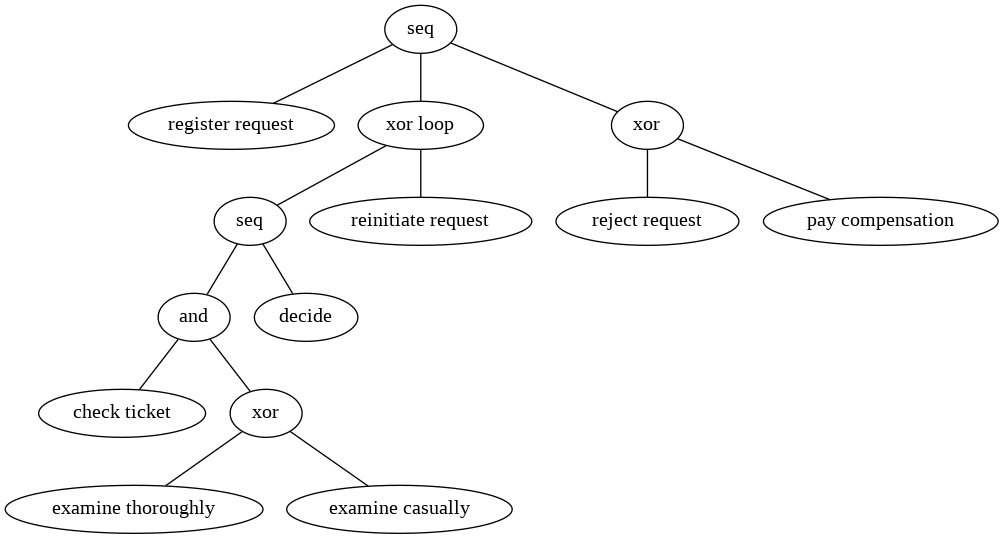

In [35]:
# Create a process tree
tree = inductive_miner.apply(log)
# Viz
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

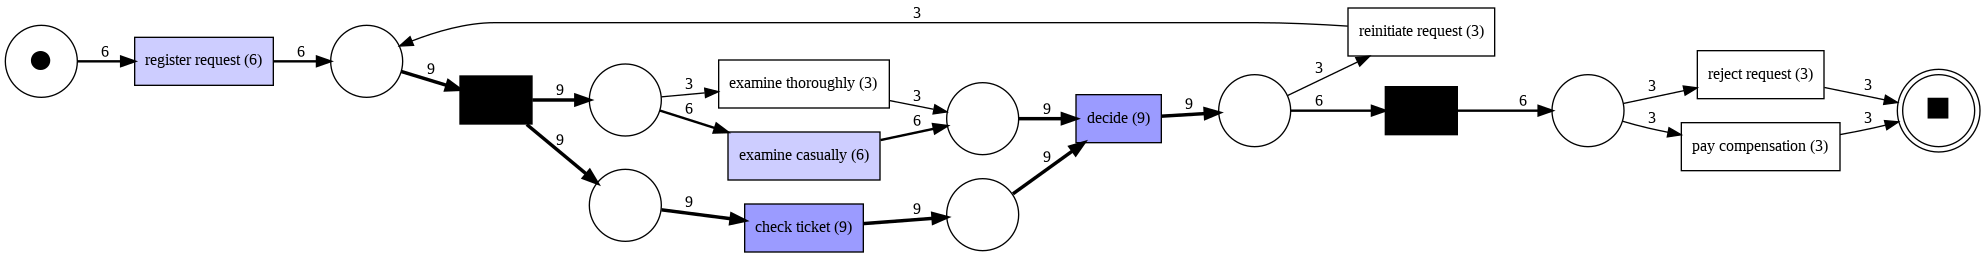

In [38]:
# Converting the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           parameters = parameters,
                           variant = pn_visualizer.Variants.FREQUENCY, 
                           log = log)
pn_visualizer.view(gviz)